# Supermarket Sales

A supermarket sales data analysis and its data is visualize. 

In [1]:
#importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
dataset = os.listdir(r"dataset")
dataset

['supermarket_sales - Sheet1.csv']

In [4]:
sales = pd.read_csv(r"dataset/supermarket_sales - Sheet1.csv")

In [5]:
#Value of sales upto 5 rows
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
#Sales column with data types
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
type(sales["Date"][0])

str

In [8]:
from pandas import to_datetime

In [9]:
sales["Date"]= to_datetime(sales["Date"])

In [10]:
type(sales["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
sales["Date"].dtype

dtype('<M8[ns]')

In [12]:
sales["Time"] = to_datetime(sales["Time"])

In [13]:
sales["Time"].dtype

dtype('<M8[ns]')

# Fetch derived attributes from data

In [14]:
sales["Date"]

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [15]:
def fetch_att(x):
    day = x.day
    month=x.month
    year=x.year
    return pd.Series([day, month, year])

In [16]:
sales[["day" , "month" ,"year"]] = sales["Date"].apply(fetch_att)

In [17]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-02-28 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-02-28 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-02-28 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-02-28 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-02-28 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [18]:
def fetch_att(x):
    hour = x.hour
    return pd.Series(hour)

In [19]:
sales["hour"] = sales["Time"].apply(fetch_att)

In [20]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-02-28 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-02-28 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2022-02-28 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2022-02-28 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2022-02-28 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


In [21]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year', 'hour'],
      dtype='object')

In [22]:
sales["Date"].apply(lambda x:x.day)

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [23]:
int('2022-02-27 13:08:00'.split(" ")[1].split(":")[0])

13

# Perform Descriptive analysis

In [24]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [25]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


1.Plot of the descriptive analysis.

<AxesSubplot:>

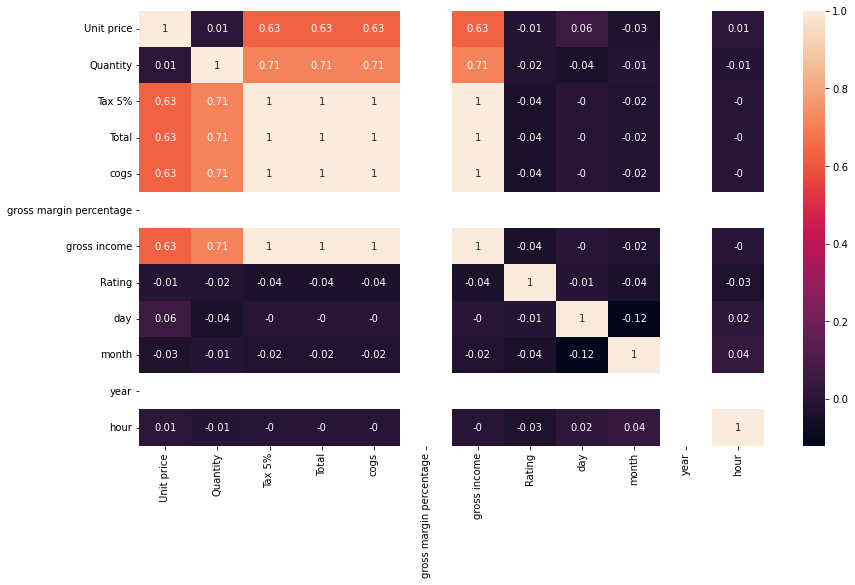

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(sales.corr(),2),annot=True)

2. Plot between Tax 5% and Gross Income

<AxesSubplot:xlabel='Tax 5%', ylabel='gross income'>

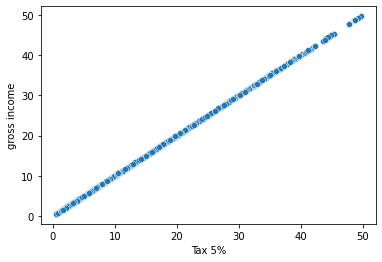

In [27]:
sns.scatterplot(x="Tax 5%", y="gross income",data=sales)

3. Cost of Goods Sold vs Quantity

<AxesSubplot:xlabel='Quantity', ylabel='cogs'>

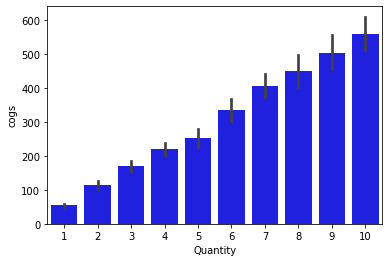

In [28]:
sns.barplot(x="Quantity", y="cogs",data=sales ,color="blue")

# Cites and Gross income in each city.

In [29]:
sales["City"]

0         Yangon
1      Naypyitaw
2         Yangon
3         Yangon
4         Yangon
         ...    
995    Naypyitaw
996     Mandalay
997       Yangon
998       Yangon
999       Yangon
Name: City, Length: 1000, dtype: object

In [30]:
#unique city in given data
sales["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [31]:
#Gross income in each city.
sales.groupby(["City"])["gross income"].median()

City
Mandalay     12.04200
Naypyitaw    12.92475
Yangon       11.46800
Name: gross income, dtype: float64

# Finding Rating

1. Mean of sales Rating

In [32]:
np.mean(sales["Rating"])

6.972700000000003

2. Plot of rating and to find average rating.

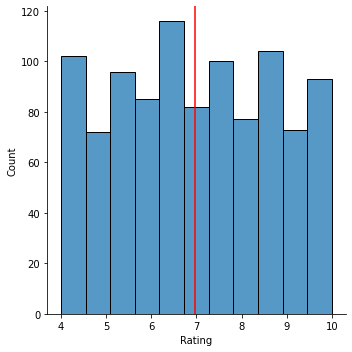

In [33]:
sns.displot(sales["Rating"],kde=False)

plt.axvline(x=np.mean(sales["Rating"]),c="red",label="Average rating")

# Define own custom functions

In [34]:
def return_countplot(column,hue_name=None):
    return sns.countplot(x=column,data=sales,hue=hue_name)

In [35]:
def return_boxplot(x_column,y_column):
    sns.boxplot(x=x_column,y=y_column,data=sales)

In [36]:
def return_lineplot(x_column,y_column):
    return sns.lineplot(x=x_column,y=y_column,data=sales)

In [37]:
def return_rel_plot(x_col, y_col, col_name=None, row_name=None, rel_type=None,hue_name=None, style_name=None):
    sns.relplot(x=x_col,y=y_col,col=col_name,row=row_name,kind=rel_type,hue=hue_name,style=style_name,data=sales)

1. Plot shows which branch ratings varies in range.To compare rating.

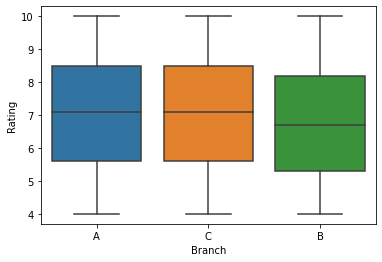

In [38]:
return_boxplot("Branch","Rating")

2. Lineplot custum function shows how quantity varies in hours.

<AxesSubplot:xlabel='hour', ylabel='Quantity'>

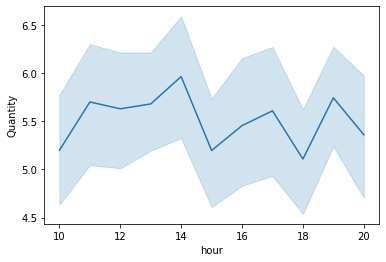

In [39]:
return_lineplot("hour","Quantity")

In [40]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year', 'hour'],
      dtype='object')

3.Gender basis variation of quantity in different branches.

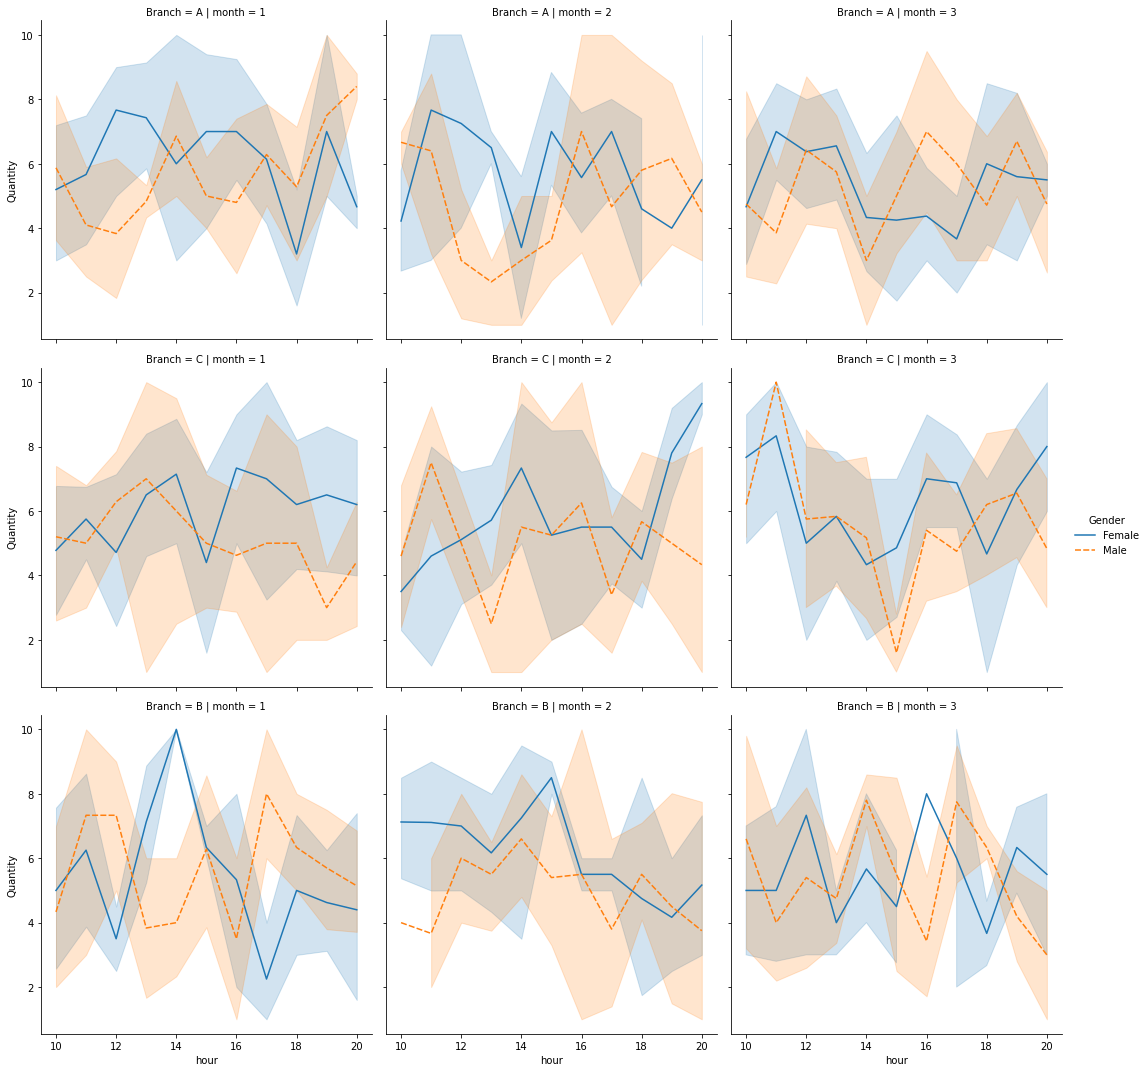

In [41]:
return_rel_plot(x_col="hour",y_col="Quantity", col_name="month", row_name="Branch", rel_type="line", hue_name="Gender",style_name="Gender")

# Perform product based analysis

1. Analysis of hour vs Total in 3 different branch in 3 months

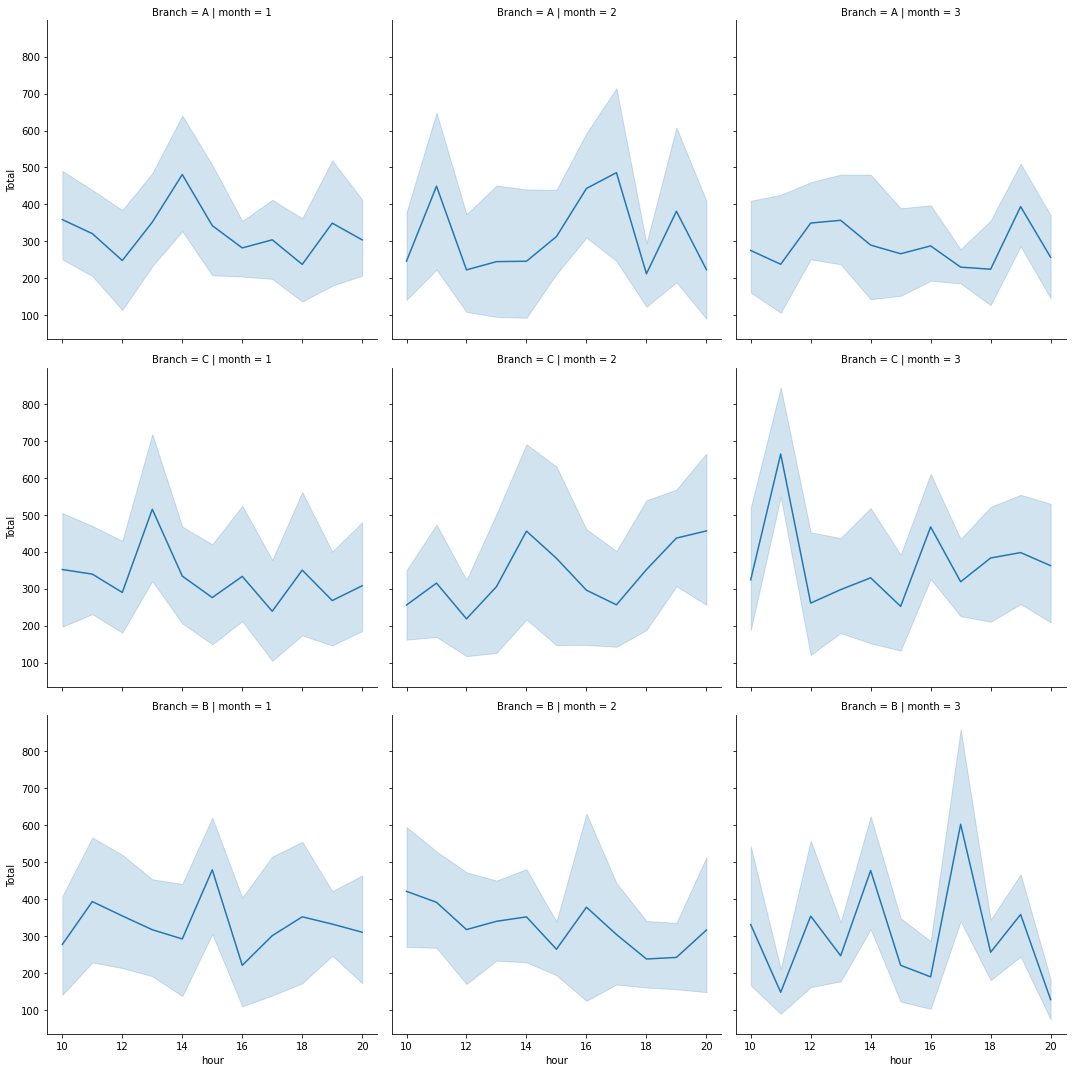

In [42]:
return_rel_plot(x_col="hour", y_col="Total", col_name="month", row_name="Branch", rel_type="line")

In [43]:
#unique productline length
len(sales["Product line"].unique())

6

2. Data visualization of 6 productline at 3 different branch.

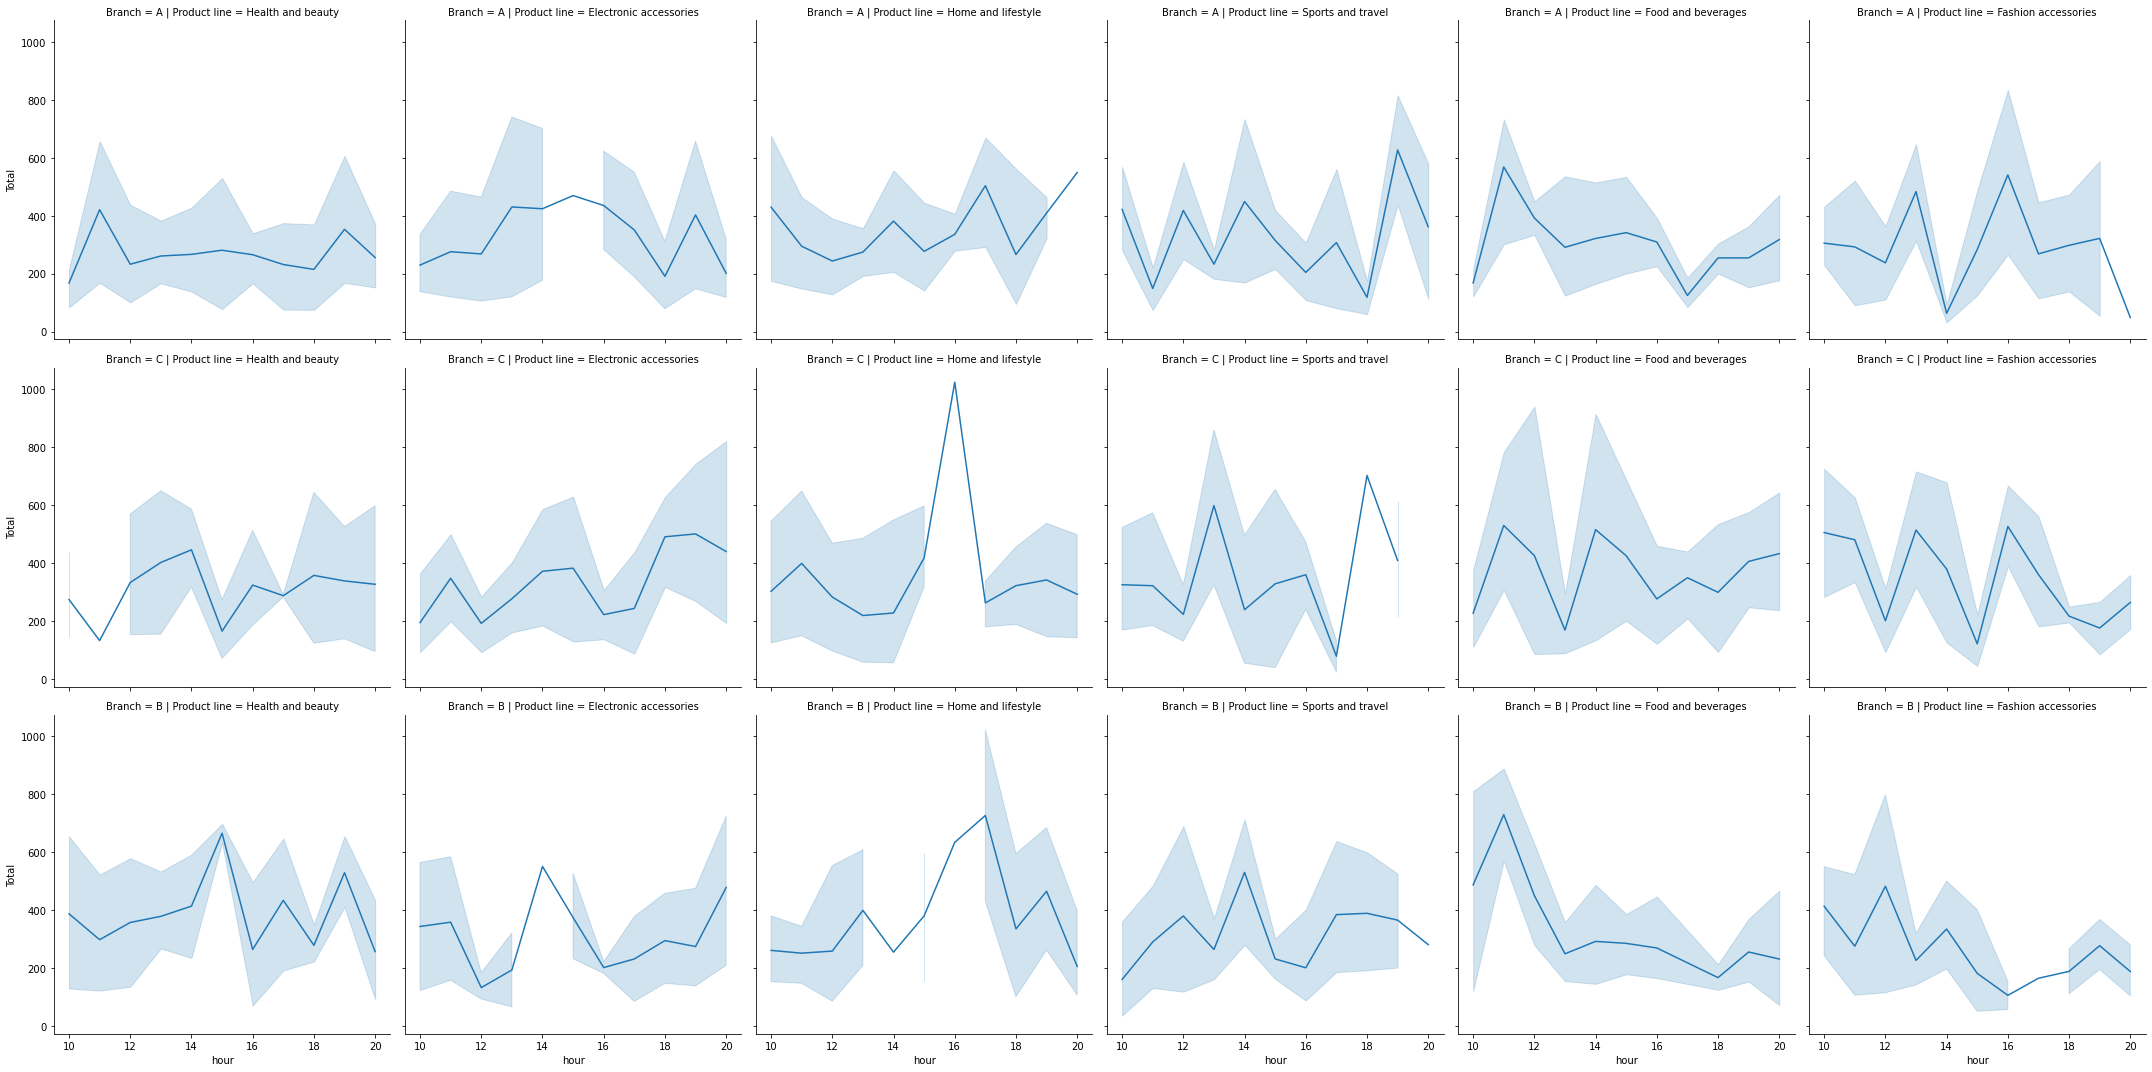

In [44]:
return_rel_plot(x_col="hour", y_col="Total", col_name="Product line", row_name="Branch", rel_type="line")

3.  Plot between product line vs quatity.

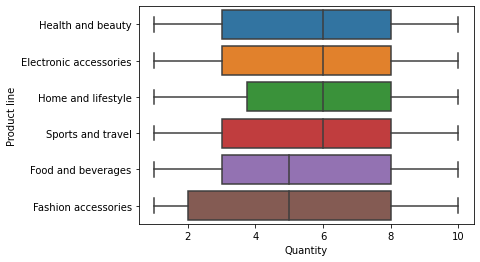

In [45]:
return_boxplot("Quantity","Product line")

4. Plot shows the count of different product line is sold overall

<AxesSubplot:xlabel='Product line', ylabel='count'>

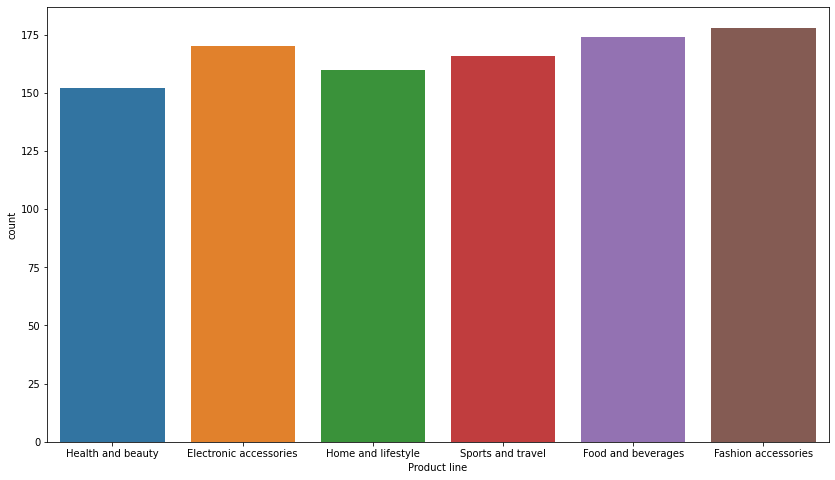

In [46]:
plt.figure(figsize=(14,8))
return_countplot("Product line")

# Analysis the sales by using different parameters

1. Plot of Gross Income of eachProduct line

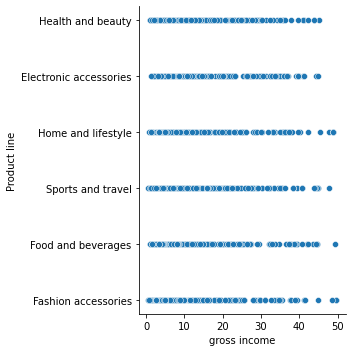

In [47]:
return_rel_plot("gross income", "Product line",rel_type="scatter")

2. Mode of payment at different branches

<AxesSubplot:xlabel='Payment', ylabel='count'>

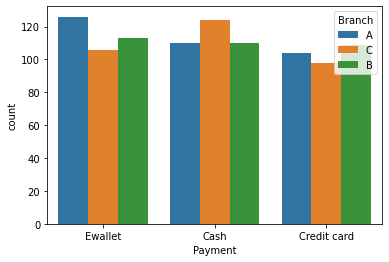

In [48]:
return_countplot("Payment",hue_name="Branch")

3. Shows customer size and its Total sales

In [49]:
sales.groupby("Customer type").agg({"Total":"sum"})

,Total
Customer type,
Member,164223.444
Normal,158743.305


# Analysing users in differnt Cities

<AxesSubplot:xlabel='Customer type', ylabel='Rating'>

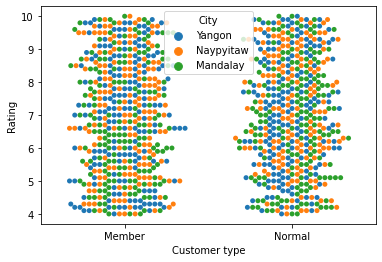

In [50]:
sns.swarmplot(x="Customer type", y="Rating", data=sales, hue="City")

# WordCloud

A wordcloud libray is used to genrate the prodect line visual displays of text data.

In [51]:
from wordcloud import WordCloud

(-0.5, 1919.5, 999.5, -0.5)

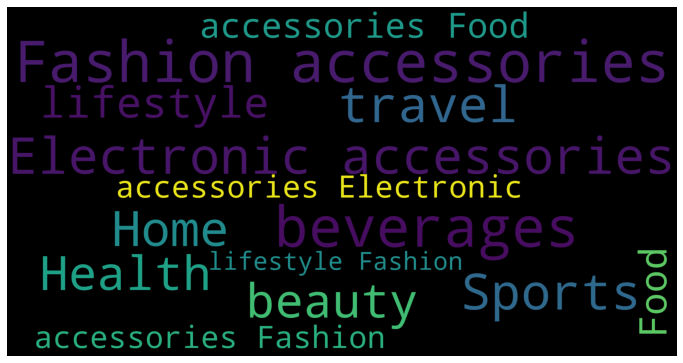

In [52]:
plt.figure(figsize=(12,8))
wordcloud=WordCloud(width=1920,height=1000).generate(' '.join(sales["Product line"]))
plt.imshow(wordcloud)
plt.axis("off")